In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns


In [3]:
fig2 = pd.read_stata("individ_final.dta")

In [4]:
# truncate the dataset
fig2 = fig2.query("-0.251 < difshare < 0.251")

In [5]:
fig2.head()

,yearel,myoutcome,second,myoutcomenext,use,difshare,difgrp,mmyoutcomenext,mrunagain,mofficeexp,melectexp,mpmyoutcomenext,mprunagain,mpofficeexp,mpelectexp
0,1946.0,1.0,NaN,0.0,NaN,0.061488,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1946.0,0.0,1.0,0.0,1.0,-0.061488,187.0,0.107143,0.214286,2.053571,2.339286,0.069917,0.285555,0.671483,0.932918
2,1948.0,1.0,NaN,1.0,1.0,0.104869,220.0,0.743590,0.871795,3.256410,3.461539,0.749363,0.869388,2.650860,2.872225
3,1948.0,0.0,1.0,0.0,NaN,-0.104869,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1950.0,1.0,NaN,0.0,1.0,0.164464,232.0,0.853659,0.951219,2.853658,3.121951,0.795229,0.873077,3.329268,3.522228


# Figure 2 A

In [6]:
# list of numbers between -1 and +1 with jump 0.05
bins = [i/1000 for i in range(-250,255, 5)]
# empty lists 
prob_of_winning = []
margin_of_vic = []
pred_logit = []

# based on the bins calculate the local average
for i in range(1,len(bins)):
    prob_of_winning.append(fig2.query(f"{bins[i-1]} <= difshare < {bins[i]}").mmyoutcomenext.mean())
    pred_logit.append(fig2.query(f"{bins[i-1]} <= difshare < {bins[i]}").mpmyoutcomenext.mean())
    # average bin value as the margin of victory (to specify point for plotting)
    margin_of_vic.append((bins[i-1] + bins[i])/ 2)

df = pd.DataFrame({
    "prob_of_winning": prob_of_winning,
    "margin_of_vic": margin_of_vic,
    "pred_logit": pred_logit
}, columns=["margin_of_vic", "prob_of_winning", "pred_logit"])

df.prob_of_winning.replace(0, np.nan, inplace= True)

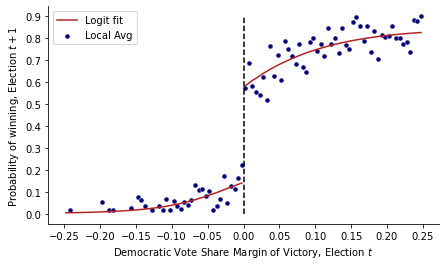

In [7]:
fig, ax = plt.subplots(figsize=(7,4))
sns.scatterplot(x = "margin_of_vic", y = "prob_of_winning", data = df, ax = ax, color = "navy", s = 25, label = "Local Avg")
sns.lineplot(x = "margin_of_vic", y = "pred_logit", data = df.query("margin_of_vic < 0"), ax = ax, color = "firebrick", label = "Logit fit")
sns.lineplot(x = "margin_of_vic", y = "pred_logit", data = df.query("margin_of_vic >= 0"), ax = ax, color = "firebrick",)

ax.vlines(0, ymin= 0, ymax=0.9, ls = "--", color="black")
sns.despine()
ax.set_xticks([i/100 for i in range(-25, 30, 5)])
ax.set_yticks([i/10 for i in range(0, 10) ])
ax.set_xlabel("Democratic Vote Share Margin of Victory, Election $t$")
ax.set_ylabel("Probability of winning, Election $t+1$")
ax.set_label(s=10)
plt.savefig('plots/fig_2_a.png', dpi=350)


# Figure 2 B

In [8]:
# repeat the same code with office exp as the variable

past_vic = []
margin_of_vic = []
pred_vic = []

# based on the bins calculate the local average
for i in range(1,len(bins)):
    past_vic.append(fig2.query(f"{bins[i-1]} <= difshare < {bins[i]}").mofficeexp.mean())
    pred_vic.append(fig2.query(f"{bins[i-1]} <= difshare < {bins[i]}").mpofficeexp.mean())
    # average bin value as the margin of victory (to specify point for plotting)
    margin_of_vic.append((bins[i-1] + bins[i])/ 2)

df_B = pd.DataFrame({
    "past_vic": past_vic,
    "margin_of_vic": margin_of_vic,
    "pred_vic": pred_vic
}, columns=["margin_of_vic", "past_vic", "pred_vic"])

df_B.past_vic.replace(0, np.nan, inplace= True)

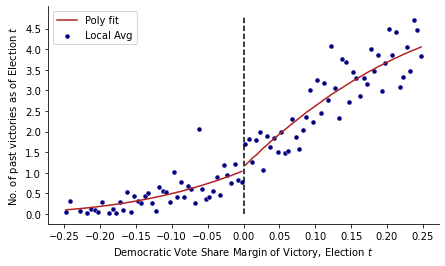

In [9]:
fig, ax = plt.subplots(figsize=(7,4))
sns.scatterplot(x = "margin_of_vic", y = "past_vic", data = df_B, ax = ax, color = "navy", s = 25, label = "Local Avg")
sns.lineplot(x = "margin_of_vic", y = "pred_vic", data = df_B.query("margin_of_vic < 0"), ax = ax, color = "firebrick", label = "Poly fit")
sns.lineplot(x = "margin_of_vic", y = "pred_vic", data = df_B.query("margin_of_vic >= 0"), ax = ax, color = "firebrick",)

ax.vlines(0, ymin= 0, ymax=4.8, ls = "--", color="black")
sns.despine()
ax.set_xticks([i/100 for i in range(-25, 30, 5)])
ax.set_yticks([i/10 for i in range(0, 50, 5) ])
ax.set_xlabel("Democratic Vote Share Margin of Victory, Election $t$")
ax.set_ylabel("No. of past victories as of Election $t$")
ax.set_label(s=10)
plt.savefig('plots/fig_2_b.png', dpi=350)

# Table 1: Data Summary

In [10]:
tab_1 = pd.read_stata("table_one_final.dta")

In [11]:
tab_1.rename(columns = {
    "Col_1": "All Winner",
    "Col_2": "All Loser",
    "Col_3": "margin (0.5) Winner",
    "Col_4": "margin (0.5) Loser",
    "Col_5": "margin (0.05) Winner",
    "Col_6": "margin (0.05) Loser",
    "Col_7": "parametric fit Winner",
    "Col_8": "parametric fit Loser"
    
}, inplace=True)

var_list = [
    "Dem vote share (t+1)",
    "_se",
    "_sd",
    "Dem win prob (t+1)",
    "_se",
    "_sd",
    "Dem vote share (t-1)",
    "_se",
    "_sd",
    "Dem win prob (t-1)",
    "_se",
    "_sd",
    "Dem pol exp",
    "_se",
    "_sd",
    "Opp pol exp",
    "_se",
    "_sd",
    "Dem elec exp",
    "_se",
    "_sd",
    "Opp elec exp",
    "_se",
    "_sd",
    "observations"
]
tab_1.Variable = var_list

In [71]:
# print(tab_1.round(3).to_latex())
tab_1.round(3)

,Variable,All Winner,All Loser,margin (0.5) Winner,margin (0.5) Loser,margin (0.05) Winner,margin (0.05) Loser,parametric fit Winner,parametric fit Loser,order
0,Dem vote share (t+1),0.698,0.347,0.629,0.372,0.542,0.446,0.531,0.454,2.0
1,_se,0.003,0.003,0.003,0.003,0.006,0.006,0.008,0.008,3.0
2,_sd,0.179,0.150,0.145,0.124,0.116,0.107,NaN,NaN,4.0
3,Dem win prob (t+1),0.909,0.094,0.878,0.100,0.681,0.202,0.611,0.253,5.0
4,_se,0.004,0.005,0.006,0.006,0.026,0.023,0.039,0.035,6.0
5,_sd,0.276,0.285,0.315,0.294,0.458,0.396,NaN,NaN,7.0
6,Dem vote share (t-1),0.681,0.368,0.607,0.391,0.501,0.474,0.477,0.481,8.0
7,_se,0.003,0.003,0.003,0.003,0.007,0.008,0.009,0.010,9.0
8,_sd,0.189,0.153,0.152,0.129,0.129,0.133,NaN,NaN,10.0
9,Dem win prob (t-1),0.889,0.109,0.842,0.118,0.501,0.365,0.419,0.416,11.0


# Table 2: RD Estimates

In [13]:
rd_data = pd.read_stata("table_two_final.dta")

In [21]:
rd_data.head()

,statedisdec,demsharenext,demshareprev,use,demwinprev,difdemshare,difdemshare2,difdemshare3,difdemshare4,demofficeexp,demelectexp,othofficeexp,othelectexp,right,rdifdemshare,rdifdemshare2,rdifdemshare3,rdifdemshare4,difdemsharenext
0,1011.0,0.546863,NaN,NaN,NaN,-0.061488,0.003781,-0.000232,0.000014,0.0,0.0,0.916667,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN
1,1011.0,0.580962,0.469256,1.0,0.0,0.104869,0.010998,0.001153,0.000121,0.0,0.0,1.000000,1.000000,1.0,0.104869,0.010998,0.001153,0.000121,0.111706
2,1011.0,NaN,0.546863,NaN,1.0,0.164464,0.027048,0.004448,0.000732,1.0,1.0,0.000000,0.000000,1.0,0.164464,0.027048,0.004448,0.000732,NaN
3,1012.0,0.569626,NaN,NaN,NaN,0.079361,0.006298,0.000500,0.000040,0.0,0.0,3.083333,3.416667,1.0,0.079361,0.006298,0.000500,0.000040,NaN
4,1012.0,0.461059,0.539680,1.0,1.0,0.139252,0.019391,0.002700,0.000376,1.0,1.0,0.000000,0.000000,1.0,0.139252,0.019391,0.002700,0.000376,-0.078622


### Dependent Variable:

Democratic vote share t+1: `demsharenext`

### Independent Variables of interest:

|Variable|Description|
|--------|-----------|
|`right` |"Victory, election t|
| `demshareprev`| "Dem. vote share, t-1"|
| `demwinprev` | "Dem. win, t-1"|
| `demofficeexp` | "Dem. political experience" |
|`othofficeexp` | "Opp. political experience" |
| `demelectexp` |"Dem. electoral experience"| 
|`othelectexp` |"Opp. electoral experience"|


### Control Variables:
 polynomial terms for vicory in election t: `difdemshare` `difdemshare2` `difdemshare3` `difdemshare4` 
 
 `rdifdemshare` `rdifdemshare2` `rdifdemshare3` `rdifdemshare4`


In [42]:
# removing NA
filtered = rd_data.loc[rd_data.use == 1.0].dropna()

In [46]:
# declaring control variables
controls = "+right + difdemshare + difdemshare2 + difdemshare3 + difdemshare4 + rdifdemshare + rdifdemshare2 + rdifdemshare3 + rdifdemshare4"

In [49]:
# column 1
model_1 = smf.ols(formula= "demsharenext ~ 1" + controls, 
                    data= filtered ).fit(cov_type='cluster', 
                                         cov_kwds={'groups': filtered.statedisdec})

# column 2
model_2 = smf.ols(formula= "demsharenext ~ 1 + demshareprev + demwinprev" + controls, 
                    data= filtered ).fit(cov_type='cluster', 
                                         cov_kwds={'groups': filtered.statedisdec})

# column 3
model_3 = smf.ols(formula= "demsharenext ~ 1 + demofficeexp + othofficeexp" + controls, 
                    data= filtered ).fit(cov_type='cluster', 
                                         cov_kwds={'groups': filtered.statedisdec})

# column 4
model_4 = smf.ols(formula= "demsharenext ~ 1 + demelectexp + othelectexp" + controls, 
                    data= filtered ).fit(cov_type='cluster', 
                                         cov_kwds={'groups': filtered.statedisdec})

# column 5
model_5 = smf.ols(formula= "demsharenext ~ 1 + demshareprev + demwinprev + demofficeexp + othofficeexp + demelectexp + othelectexp" + controls, 
                    data= filtered ).fit(cov_type='cluster', 
                                         cov_kwds={'groups': filtered.statedisdec})

In [59]:
# column 6
ols_model = smf.ols(formula= "demsharenext ~  1 + demwinprev + demofficeexp + othofficeexp + demelectexp + othelectexp", data = filtered).fit()

filtered["resid_vs"] = ols_model.resid

model_6 = smf.ols(formula= "resid_vs ~ right" + controls, data= filtered).fit(cov_type='cluster', 
                                         cov_kwds={'groups': filtered.statedisdec})

In [61]:
# column 7
model_7 = smf.ols(formula= "difdemsharenext ~ 1 + demwinprev + demofficeexp + othofficeexp + demelectexp + othelectexp" + controls, 
                    data= filtered ).fit(cov_type='cluster', 
                                         cov_kwds={'groups': filtered.statedisdec})
# column 8                                         
model_8 = smf.ols(formula= "demshareprev ~ 1 + demwinprev + demofficeexp + othofficeexp + demelectexp + othelectexp" + controls, 
                    data= filtered ).fit(cov_type='cluster', 
                                         cov_kwds={'groups': filtered.statedisdec})

In [63]:
# list of models 
Models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8]

reg_orger = ["right", "demshareprev", "demwinprev", "demofficeexp", "othofficeexp", "demelectexp", "othelectexp"]

In [64]:
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}
           
results_table = summary_col(results= Models,
                            float_format='%0.3f',
                            stars = True,
                            model_names=["(1)\n Vote Share \n t+1",
                                         "(2)\n Vote Share \n t+1",
                                         "(3)\n Vote Share \n t+1",
                                         "(4)\n Vote Share \n t+1",
                                         "(5)\n Vote Share \n t+1",
                                         "(6)\n Res. Vote Share \n t+1",
                                         "(7)\n 1st Dif Vote Share \n t+1",
                                         "(8)\n Vote Share \n t-1",
                                         ],

                            info_dict=info_dict,
                            
                            regressor_order=reg_orger,
                            drop_omitted=  True
                            )

In [72]:
print(results_table.as_latex())
# results_table

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{lllllllll}
\hline
                 & (1)          & (2)          & (3)          & (4)          & (5)          & (6)               & (7)                  & (8)           \\
                 &  Vote Share  &  Vote Share  &  Vote Share  &  Vote Share  &  Vote Share  &  Res. Vote Share  &  1st Dif Vote Share  &  Vote Share   \\
                 &  t+1         &  t+1         &  t+1         &  t+1         &  t+1         &  t+1              &  t+1                 &  t-1          \\
\hline
right            &              &              &              &              &              & 0.080***          &                      &               \\
                 &              &              &              &              &              & (0.016)           &                      &               \\
demshareprev     &              & 0.292***     &              &              & 0.297***     &                   &                      &    